![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 4: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-11-07)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_4_EXERCISES.ipynb)

# Exercise 1: dispersion plots [OBLIGATORY]

1. Load the `holy_grail.txt` dataset and create a dictionary of names and indexes like `{"NAME": [1, 2, 5, 10, ...]}` to store when does each NOUN appears among the 5 most frequent ones.
3. Visualize in the same graph the appearances of the top 5 characters to compare them.
4. **OPTIONAL**: Try the same exercise with [this file in the GitHub repo](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/pride_and_prejudice.txt)

In [1]:
import pandas as pd
import numpy as np
import spacy


In [4]:
nlp= spacy.load('en_core_web_md')
holy_grail=nlp(open('holy_grail.txt','r').read())

In [6]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS


noun_counter=Counter()

for token in holy_grail:
    if token.pos_=='NOUN' and token.text not in STOP_WORDS and token.text !='#':
        noun_counter[token.lower_] +=1


In [7]:
noun_counter.most_common(5)

[('villager', 47), ('boom', 44), ('witch', 41), ('guard', 32), ('knights', 29)]

In [8]:
nouns,_=zip(*noun_counter.most_common(5))
nouns

('villager', 'boom', 'witch', 'guard', 'knights')

In [9]:
from collections import defaultdict

indexes=defaultdict(list)

for token in holy_grail:
    if token.lower_ in nouns:
        indexes[token.lower_].append(token.i)

In [10]:
indexes

defaultdict(list,
            {'knights': [112,
              2344,
              4248,
              4356,
              4470,
              4497,
              4504,
              4553,
              4609,
              4686,
              4858,
              5023,
              5521,
              5542,
              5589,
              5926,
              6060,
              6129,
              7590,
              8193,
              9262,
              9294,
              9316,
              9385,
              9398,
              9424,
              9510,
              9580,
              13140,
              13545,
              13606,
              13614,
              13634,
              13688,
              13690,
              13773,
              13882,
              13931,
              13959,
              13984,
              14025,
              14182,
              14198,
              14228,
              14259,
              14332,
              14388,
             

2. Visualize in the same graph the appearances of the top 5 characters to compare them.

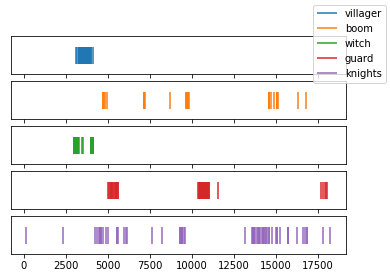

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,axes = plt.subplots(5, sharex=True)

for ii, noun in enumerate(nouns):
    axes[ii].eventplot(indexes[noun], label=noun, color="C{}".format(ii))
    axes[ii].get_yaxis().set_visible(False)
fig.legend()

4. **OPTIONAL**: Try the same exercise with [this file in the GitHub repo](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/pride_and_prejudice.txt)

In [30]:
!wget 'https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/pride_and_prejudice.txt'

--2019-11-13 15:41:00--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/pride_and_prejudice.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 704145 (688K) [text/plain]
Saving to: ‘pride_and_prejudice.txt’

pride_and_prejudice 100%[===================>] 687,64K  1,24MB/s    in 0,5s    

2019-11-13 15:41:01 (1,24 MB/s) - ‘pride_and_prejudice.txt’ saved [704145/704145]



In [12]:
pride_np= nlp(open('pride_and_prejudice.txt','r').read())

In [13]:
noun_counter=Counter()

for token in pride_np:
    if token.pos_=='NOUN' and token.text not in STOP_WORDS and token.text !='_':
        noun_counter[token.text] += 1

In [14]:
noun_counter.most_common(5)

[('sister', 218), ('time', 203), ('family', 151), ('room', 150), ('man', 148)]

In [15]:
nouns,_=zip(*noun_counter.most_common(5))
nouns

('sister', 'time', 'family', 'room', 'man')

In [16]:
indexes=defaultdict(list)

for token in pride_np:
    if token.text in nouns:
        indexes[token.text].append(token.i)

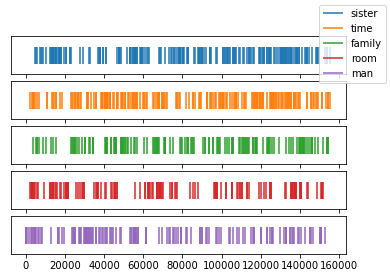

In [17]:
fig, axes = plt.subplots(5, sharex=True)

for ii, noun in enumerate(nouns):
    axes[ii].eventplot(indexes[noun], label=noun, color="C{}".format(ii))
    axes[ii].get_yaxis().set_visible(False)
fig.legend()

# Exercise 2: clustering words [OBLIGATORY]

Generate a scatter plot with the distance of the words in [this file](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/1-1000.txt). Load it correctly, beware not to load it as html! Use either PCA or t-SNE to cluster the words, play with different language models. For extra points, find the way to annotate the labels without clustering them, using arrows for instance. [Hint](https://stackoverflow.com/questions/40021676/pyplot-label-scatter-plot-with-coincident-points-overlapping-annotations).

In [52]:
!wget 'https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/1-1000.txt'

--2019-11-13 16:01:06--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/1-1000.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5830 (5,7K) [text/plain]
Saving to: ‘1-1000.txt’

1-1000.txt          100%[===================>]   5,69K  --.-KB/s    in 0,005s  

2019-11-13 16:01:06 (1,23 MB/s) - ‘1-1000.txt’ saved [5830/5830]



In [11]:
file=open('1-1000.txt','r')
lista=''
for line in file.readlines():
    lista+=line
len(lista)
lista

"the\nof\nto\nand\na\ninhis\nis\nit\nyou\nthat\nhe\nwas\nfor\non\nare\nwith\nas\nI\nhis\nthey\nbe\nat\none\nhave\nthis\nfrom\nor\nhad\nby\nword\nbut\nwhat\nsome\nwe\ncan\nout\nother\nwere\nall\nthere\nwhen\nup\nuse\nyour\nhow\nsaid\nan\neach\nshe\nwhich\ntheir\ntime\nif\nwill\nway\nabout\nmany\nthen\nthem\nwrite\nwould\nlike\nso\nthese\nher\nlong\nmake\nthing\nsee\nhim\ntwo\nhas\nlook\nmore\nday\ncould\ngo\ncome\ndid\nnumber\nsound\nno\nmost\npeople\nmy\nover\nknow\nwater\nthan\ncall\nfirst\nwho\nmay\ndown\nside\nbeen\nnow\nfind\nany\nnew\nwork\npart\ntake\nget\nplace\nmade\nlive\nwhere\nafter\nback\nlittle\nonly\nround\nman\nyear\ncame\nshow\nevery\ngood\nme\ngive\nour\nunder\nname\nvery\nthrough\njust\nform\nsentence\ngreat\nthink\nsay\nhelp\nlow\nline\ndiffer\nturn\ncause\nmuch\nmean\nbefore\nmove\nright\nboy\nold\ntoo\nsame\ntell\ndoes\nset\nthree\nwant\nair\nwell\nalso\nplay\nsmall\nend\nput\nhome\nread\nhand\nport\nlarge\nspell\nadd\neven\nland\nhere\nmust\nbig\nhigh\nsuch\nfollo

In [7]:
from sklearn.decomposition import PCA

lista_tokens=nlp(lista)
lista_vectors=np.vstack([word.vector for word in lista_tokens if word.has_vector])
pca=PCA(n_components=2)
lista_vec_transf=pca.fit_transform(lista_vectors)
len(lista_tokens)
lista_vectors.shape

(997, 300)

In [9]:
for word in lista_tokens:
    print(word,word.has_vector)

the True

 False
of True

 False
to True

 False
and True

 False
a True

 False
inhis False

 False
is True

 False
it True

 False
you True

 False
that True

 False
he True

 False
was True

 False
for True

 False
on True

 False
are True

 False
with True

 False
as True

 False
I True

 False
his True

 False
they True

 False
be True

 False
at True

 False
one True

 False
have True

 False
this True

 False
from True

 False
or True

 False
had True

 False
by True

 False
word True

 False
but True

 False
what True

 False
some True

 False
we True

 False
can True

 False
out True

 False
other True

 False
were True

 False
all True

 False
there True

 False
when True

 False
up True

 False
use True

 False
your True

 False
how True

 False
said True

 False
an True

 False
each True

 False
she True

 False
which True

 False
their True

 False
time True

 False
if True

 False
will True

 False
way True

 False
about True

 False
many True

 False
then True

 False
th

 False
support True

 False
speech True

 False
nature True

 False
range True

 False
steam True

 False
motion True

 False
path True

 False
liquid True

 False
log True

 False
meant True

 False
quotient True

 False
teeth True

 False
shell True

 False
neck True

 False


In [87]:
lista_vec_transf

array([[-2.4310246e-01,  5.2648687e-01],
       [ 2.0247197e-03,  8.4441239e-01],
       [-8.4680778e-01,  6.4401281e-01],
       ...,
       [ 1.2958443e+00, -6.1067897e-01],
       [ 2.4886656e+00,  6.9856632e-01],
       [ 2.1822348e+00, -9.5053715e-01]], dtype=float32)

In [88]:
lista_vec_transf=np.c_[lista.split(),lista_vec_transf]
lista_vec_transf

array([['the', '-0.24310246', '0.5264869'],
       ['of', '0.0020247197', '0.8444124'],
       ['to', '-0.8468078', '0.6440128'],
       ...,
       ['teeth', '1.2958443', '-0.610679'],
       ['shell', '2.4886656', '0.6985663'],
       ['neck', '2.1822348', '-0.95053715']], dtype='<U32')

In [90]:
equis=[float(x) for x in lista_vec_transf[:,1]]
ygriega=[float(x) for x in lista_vec_transf[:,2]]

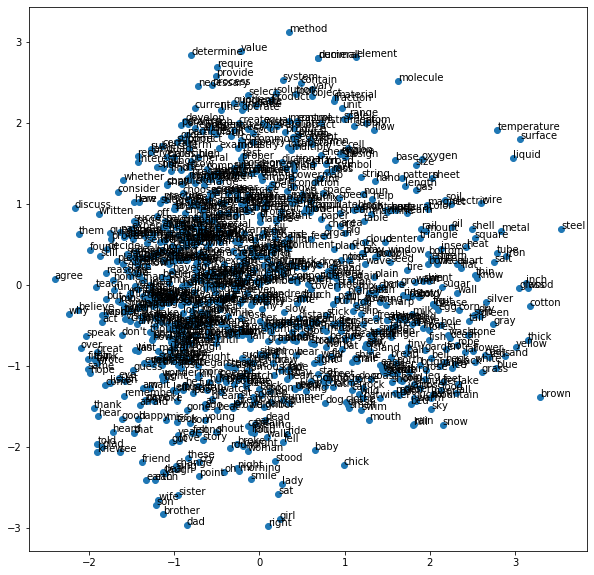

In [92]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(equis,ygriega)

for i,txt in enumerate(lista_vec_transf[:,0]):
    ax.annotate(txt,(equis[i],ygriega[i]))

In [124]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, init='random', random_state=0,perplexity=1)
lista_vecs_tsne=tsne.fit_transform(lista_vectors)

In [125]:
lista_vecs_tsne=np.c_[lista.split(),lista_vecs_tsne]
lista_vecs_tsne

array([['the', '-31.652187', '22.909773'],
       ['of', '-31.67487', '23.001741'],
       ['to', '27.283583', '18.985159'],
       ...,
       ['teeth', '34.38145', '5.68394'],
       ['shell', '13.685517', '-65.00711'],
       ['neck', '63.059772', '14.567946']], dtype='<U32')

In [126]:
equis=[float(x) for x in lista_vecs_tsne[:,1]]
ygriega=[float(x) for x in lista_vecs_tsne[:,2]]
dist=[float(x)-float(y) for x,y in zip(lista_vecs_tsne[:,1],lista_vecs_tsne[:,2])]

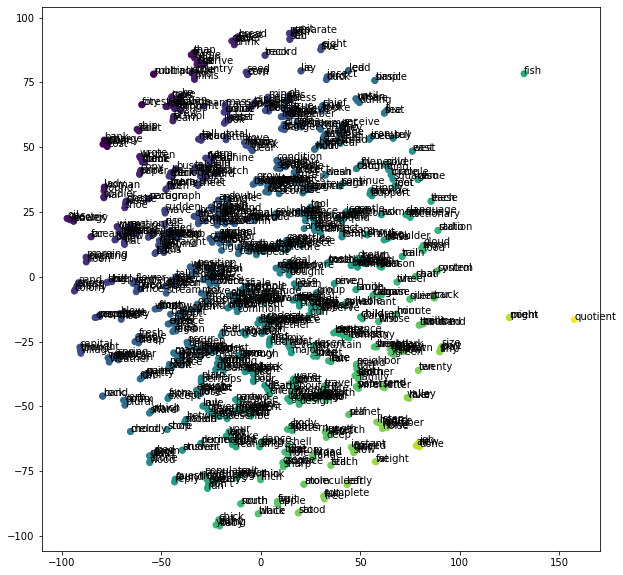

In [127]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(equis, ygriega, c=dist)

for i, txt in enumerate(lista_vecs_tsne[:, 0]):
    ax.annotate(txt, (equis[i], ygriega[i]))

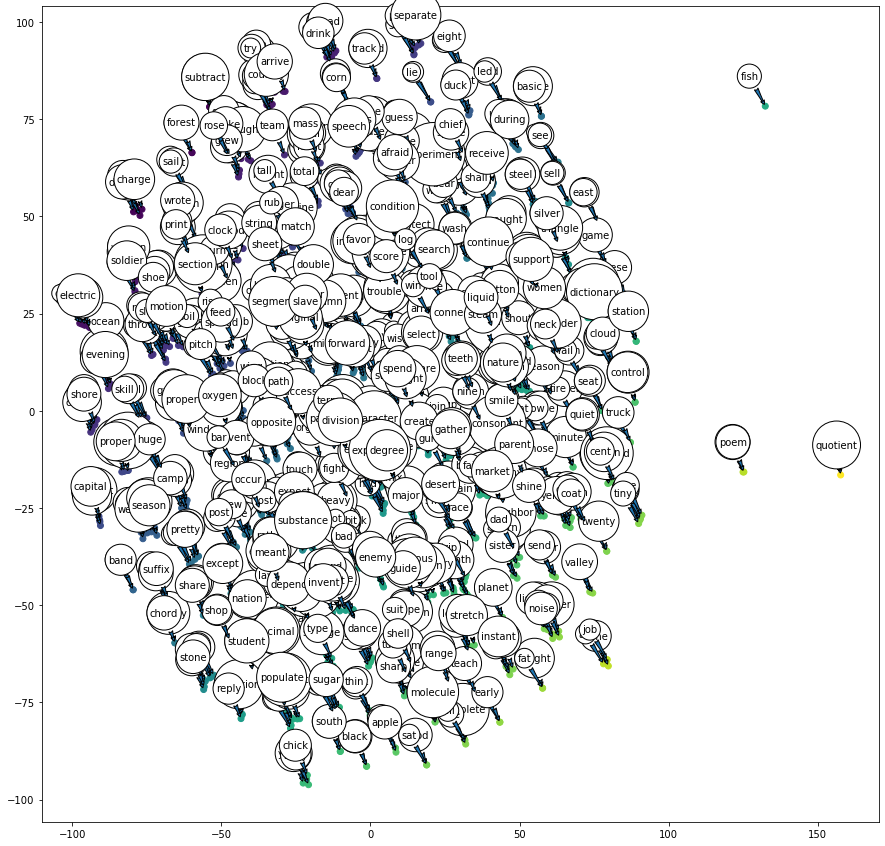

In [114]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(equis, ygriega, c=dist)

for i, txt in enumerate(lista_vecs_tsne[:, 0]):
    ax.annotate(txt, (equis[i], ygriega[i]),xytext=(-25,25),
               textcoords='offset points', ha='left',va='bottom',
                bbox=dict(boxstyle='circle,pad=0.3',fc='w'),
               arrowprops=dict(arrowstyle='fancy',connectionstyle='arc3'))
plt.show()

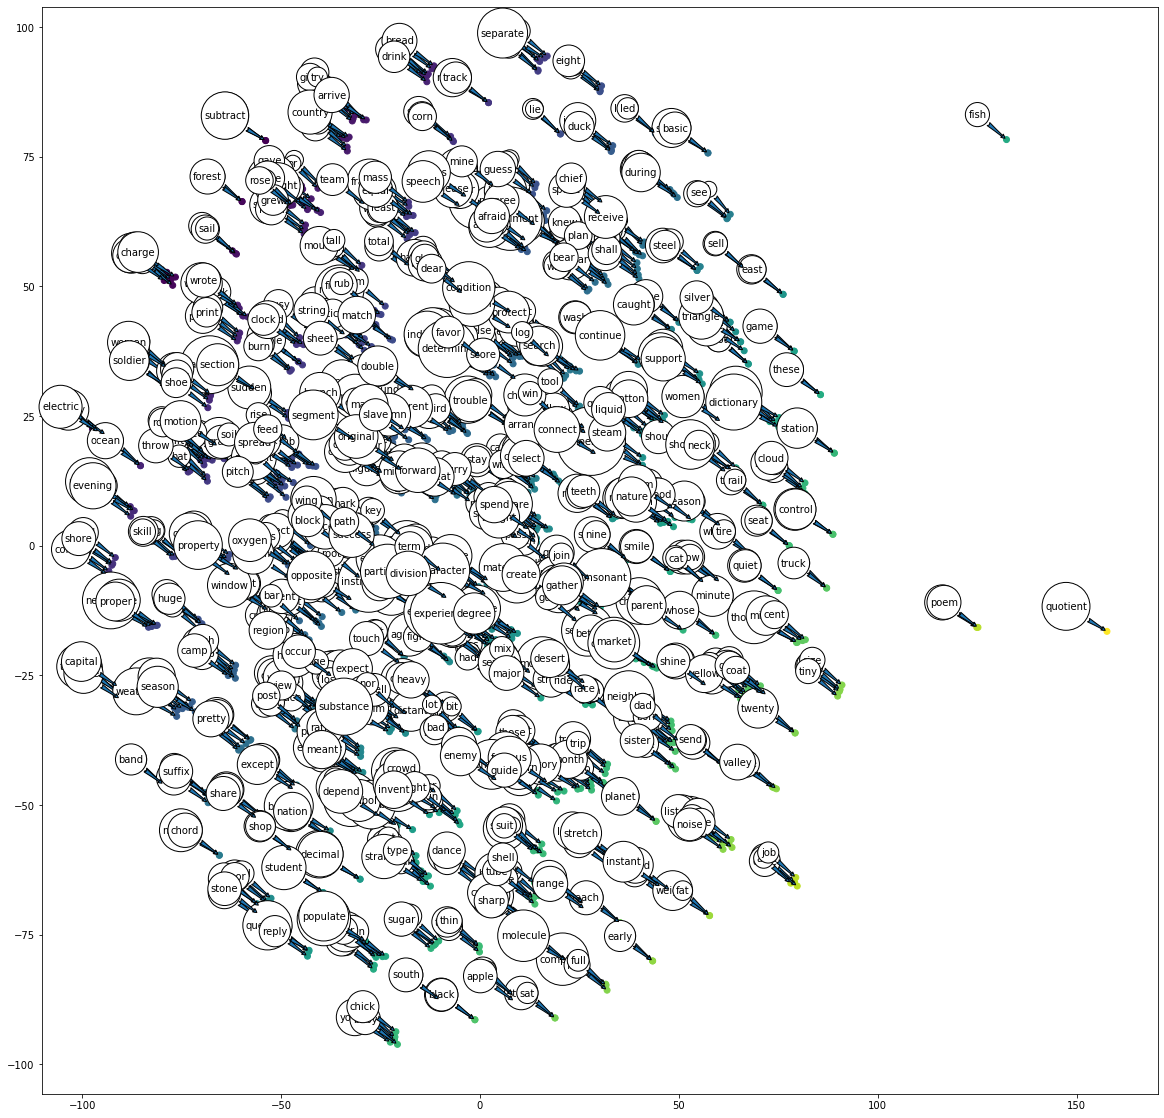

In [160]:
plt.subplots(figsize=(20,20))
plt.scatter(equis, ygriega, c=dist)

old_x = old_y = 1e9 # make an impossibly large initial offset
thresh = .1 #make a distance threshold

for label, x, y in zip(lista_vecs_tsne[:, 0], equis, ygriega):
    #calculate distance
    d = ((x-old_x)**2+(y-old_y)**2)**(.5)

    #if distance less than thresh then flip the arrow
    flip = 1
    if d < .1: flip=-2

    plt.annotate(label,xy=(x,y),xytext=(-20*flip,20*flip),
               textcoords='offset points', ha='right',va='bottom',
                bbox=dict(boxstyle='circle,pad=0.3',fc='w'),
               arrowprops=dict(arrowstyle='fancy',connectionstyle='arc3'))
    old_x=x
    old_y=y
    
plt.show()

TypeError: 'zip' object is not subscriptable

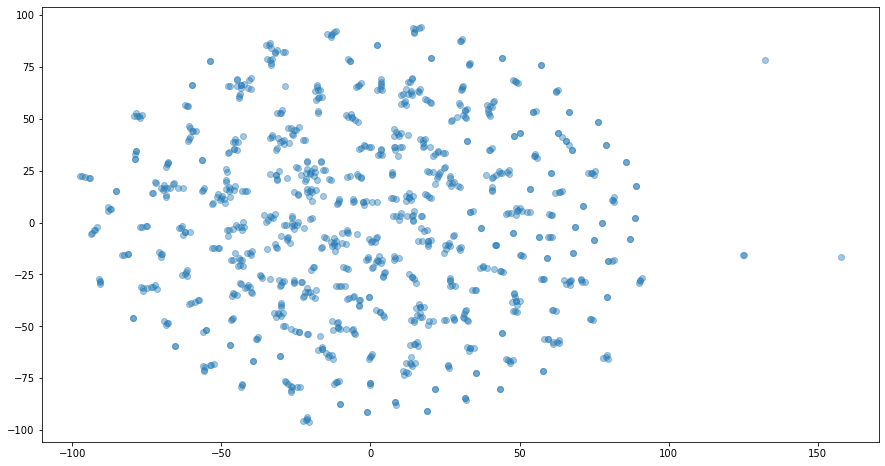

In [170]:
def get_text_positions(x_data, y_data, txt_width, txt_height):
    a = zip(y_data, x_data)
    text_positions = y_data.copy()
    for index, (y, x) in enumerate(a):
        local_text_positions = [i for i in a if i[0] > (y - txt_height)
                            and (abs(i[1] - x) < txt_width * 2) and i != (y,x)]
        if local_text_positions:
            sorted_ltp = sorted(local_text_positions)
            if abs(sorted_ltp[0][0] - y) < txt_height: #True == collision
                differ = np.diff(sorted_ltp, axis=0)
                a[index] = (sorted_ltp[-1][0] + txt_height, a[index][1])
                text_positions[index] = sorted_ltp[-1][0] + txt_height
                for k, (j, m) in enumerate(differ):
                    #j is the vertical distance between words
                    if j > txt_height * 1.5: #if True then room to fit a word in
                        a[index] = (sorted_ltp[k][0] + txt_height, a[index][1])
                        text_positions[index] = sorted_ltp[k][0] + txt_height
                        break
    return text_positions

def text_plotter(x_data, y_data, text_positions, axis,txt_width,txt_height):
    for x,y,t in zip(x_data, y_data, text_positions):
        axis.text(x - .03, 1.02*t, '%d'%int(y),rotation=0, color='blue', fontsize=13)
        if y != t:
            axis.arrow(x, t+20,0,y-t, color='blue',alpha=0.2, width=txt_width*0.0,
                       head_width=.02, head_length=txt_height*0.5,
                       zorder=0,length_includes_head=True)

x_data = equis
y_data = ygriega

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(x_data, y_data, alpha = 0.4)
txt_height = 0.04*(plt.ylim()[1] - plt.ylim()[0])
txt_width = 0.02*(plt.xlim()[1] - plt.xlim()[0])
text_positions = get_text_positions(x_data, y_data, txt_width, txt_height)
text_plotter(x_data, y_data, text_positions, ax, txt_width, txt_height)

plt.ylim(0,3610)
plt.xlim(4.3,6.5)


periscope.output(plt)

# Exercise 3: Jaccard Similairty and TF-IDF [OBLIGATORY]

Collect at least 7 sentences from political parties in your country. Try to do Jaccard Similarity and tf-idf on them so that you can see what are the most common words used between the parties. You neeed to translate the sentences to english, so that I can evaluate :)

Why Jaccard Similarity tends to fail? [Hint](https://medium.com/@adriensieg/text-similarities-da019229c894)

If you do not want to collect those sentences use the following:



In [18]:
t0 = "President Trump greets the press in Chicago addressing the Cambridge Analytica release"
t1 = "Trump speaks in front of the press in Chicago, regarding the Cambridge Analytica scandal"
t2 = "Vladimir Putin, president of Russia, denies any involvement with electoral hacking through Cambridge Analytica"
t3 = "Democrats accuse Russia of interfernig the United States elections using hacking methods"
t4 = "Republicans deny any interference from Russia into the elections, and mock democrats about it"
t5 = "Vladimir Putin attends a press conference about the issues occurring in Crimea"
t6 = "The president of Russia, Vladimir Putin, replied questions regarding the scandal around Crimea"

In [19]:
#JACCARD:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp=spacy.load('en_core_web_md')

def lemmatize(doc):
    return [token.lemma_ for token in doc if not 
            (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]

In [20]:
def jaccard(doc1,doc2):
    s1=set(lemmatize(doc1))
    s2=set(lemmatize(doc2))
    return len(s1.intersection(s2))/len(s1.union(s2))

In [21]:
data=np.zeros((7,7))
docs=[nlp(text) for text in (t0,t1,t2,t3,t4,t5,t6)]

for ii,doc_a in enumerate(docs):
    for jj,doc_b in enumerate(docs):
        data[ii,jj]=jaccard(doc_a,doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.000000,0.454545,0.117647,0.000000,0.000000,0.062500,0.000000
1,0.454545,1.000000,0.133333,0.000000,0.000000,0.071429,0.071429
2,0.117647,0.133333,1.000000,0.117647,0.133333,0.125000,0.285714
3,0.000000,0.000000,0.117647,1.000000,0.142857,0.000000,0.062500
4,0.000000,0.000000,0.133333,0.142857,1.000000,0.000000,0.071429
5,0.062500,0.071429,0.125000,0.000000,0.000000,1.000000,0.230769
6,0.000000,0.071429,0.285714,0.062500,0.071429,0.230769,1.000000


The thing is that Jaccard tend to fail because is not analizing the sense of the word and how it is enbeded in a phrase. Is only looking for the same lemmas in different words. But if there are not the same lemmas, the similaity is cero with out looking if the meaning is similar.

In [22]:
#TF-IDF:
from collections import Counter

def tf(word, doc):
    counts=Counter(lemmatize(doc))
    return counts[word]

In [23]:
def idf(word,docs):
    count=0
    for doc in docs:
        if word in lemmatize(doc):
            count +=1
    return count/len(docs)

In [24]:
def tf_idf(word, doc, docs):
    return tf(word,doc)*idf(word,docs)

In [25]:
def all_lemmas(docs):
    lemmas=set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

In [26]:
def tf_idf_doc(doc,docs):
    lemmas=all_lemmas(docs)
    res={}
    for lemma in lemmas:
        res[lemma]=tf_idf(lemma,doc,docs)
    return res

In [27]:
def tf_idf_scores(docs):
    lemmas=all_lemmas(docs)
    rows=[]
    for doc in docs:
        rows.append(tf_idf_doc(doc,docs))
    return pd.DataFrame(rows)

In [28]:
tb=tf_idf_scores(docs)
tb

,Chicago,Republicans,speak,interference,Putin,issue,Russia,scandal,hacking,Analytica,...,involvement,conference,election,press,president,question,Trump,accuse,greet,States
0,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,...,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.285714,0.000000,0.142857,0.000000
1,0.285714,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.428571,...,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.571429,0.000000,0.285714,0.428571,...,0.142857,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.285714,0.000000,...,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857
4,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.428571,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.571429,0.285714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.000000,0.000000,0.000000,0.000000


In [29]:
tb/tb.max().max()

,Chicago,Republicans,speak,interference,Putin,issue,Russia,scandal,hacking,Analytica,...,involvement,conference,election,press,president,question,Trump,accuse,greet,States
0,0.5,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.75,...,0.00,0.00,0.0,0.75,0.0,0.00,0.5,0.00,0.25,0.00
1,0.5,0.00,0.25,0.00,0.00,0.00,0.0,0.5,0.0,0.75,...,0.00,0.00,0.0,0.75,0.0,0.00,0.5,0.00,0.00,0.00
2,0.0,0.00,0.00,0.00,0.75,0.00,1.0,0.0,0.5,0.75,...,0.25,0.00,0.0,0.00,0.5,0.00,0.0,0.00,0.00,0.00
3,0.0,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.5,0.00,...,0.00,0.00,0.5,0.00,0.0,0.00,0.0,0.25,0.00,0.25
4,0.0,0.25,0.00,0.25,0.00,0.00,1.0,0.0,0.0,0.00,...,0.00,0.00,0.5,0.00,0.0,0.00,0.0,0.00,0.00,0.00
5,0.0,0.00,0.00,0.00,0.75,0.25,0.0,0.0,0.0,0.00,...,0.00,0.25,0.0,0.75,0.0,0.00,0.0,0.00,0.00,0.00
6,0.0,0.00,0.00,0.00,0.75,0.00,1.0,0.5,0.0,0.00,...,0.00,0.00,0.0,0.00,0.5,0.25,0.0,0.00,0.00,0.00


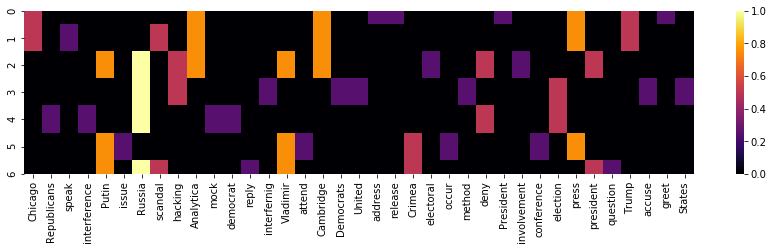

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
sns.heatmap(tb/tb.max().max(),cmap='inferno',annot=False)

In [42]:
t0="Pasada la elección, la Argentina va a volver a crecer. Se han creado 1 millón de puestos de trabajo pero muchos informales. El desafío es seguir generando empleo formal de calidad. Para generar empleo hay que desarrollar el país y hay que conectarlo y hacer obras."
t1="En la obra pública hay una matriz de corrupción: se robaban la plata de las obras. Generamos un sistema de licitaciones por internet. Uno puede entrar a la página de Vialidad y ver que por el precio de una autopista kirchnerista, nosotros hacemos dos."
t2="Ellos cuando gobiernan creen que son los dueños de la plata del país."
t3="Desde el primer día trabajé codo a codo con los trabajadores. Creo que el futuro pasa por el desarrollo federal del país. Hablan del Estado, nos dejaron un estado sin estadísticas, sin controles y lleno de militantes. Hoy tenemos un Estado moderno, electrónico, simplificando los trámites."
t4="Es indignante escucharlos hablar de pobreza, no les creo nada. Alberto Fernandez intervino en el 2007 el INDEC. Ellos siempre han usado a los pobres y han hecho clientelismo. 35 años gobernando La Matanza y no han hecho una obra. De verdad nos queremos ocupar y nos ocupamos de la pobreza. La crisis de abril volvió atrás lo que habíamos logrado hasta el 2017. Proponemos darle cloacas a todos los argentinos. Lo que queremos es que sean libres y no sean parte de un aparato clientelista."
t5="Cientos de miles de argentinos marcharon ayer con alegría y en paz. Están convencidos de que vamos a dar vuelta la historia de la Argentina. Hoy estamos mejor parados para arrancar al futuro que todos queremos."
t6="Esta semana se dedicaron a hablar de mi índice, el cual solo marca errores y señala inconductas ... Sería bueno que hablaran de otros índices: desocupación, pobreza e inflación. Ocupémonos de lo importante."
t7="Es fácil pegarle a lo que la inseguridad genera, hablar de penas más fuertes, pero la inseguridad está directamente vinculada a la desigualdad. Las sociedades más igualitarias son las que menos crimen tienen. La Argentina ha generado una gran desigualdad en estos años. Vamos a reconstruir el control social. Al que delinque hay que castigarlo y en eso la Justicia debe ser implacable."
t8="Hoy la Argentina tiene la tasa más alta de desempleo los últimos 13 años. Tenemos un Presidente que piensa que el trabajo es un costo. Ha cerrado el Ministerio y siempre pensó que los desempleados puedan convertirse en emprendedores. Esos emprendedores son monotributistas que se suben a una bicicleta y reparten pizzas."
t9="El trabajo en blanco es la mejor garantía de paz social. Nosotros hemos perdido mucho trabajo porque la economía no para de caer. Se cerraron 43 pymes por día. La capacidad instalada solo se usa en un 60%."

In [32]:
nlp = spacy.load("es_core_news_sm")

In [33]:
data=np.zeros((10,10))
docs=[nlp(text) for text in (t0,t1,t2,t3,t4,t5,t6,t7,t8,t9)]

for ii,doc_a in enumerate(docs):
    for jj,doc_b in enumerate(docs):
        data[ii,jj]=jaccard(doc_a,doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.133333,0.119048,0.125000,0.123457,0.120690,0.070175,0.140845,0.123077,0.114754
1,0.133333,1.000000,0.097561,0.111111,0.112500,0.067797,0.092593,0.112676,0.126984,0.081967
2,0.119048,0.097561,1.000000,0.113636,0.114754,0.076923,0.055556,0.074074,0.086957,0.071429
3,0.125000,0.111111,0.113636,1.000000,0.081395,0.135593,0.067797,0.106667,0.136364,0.093750
4,0.123457,0.112500,0.114754,0.081395,1.000000,0.116883,0.078947,0.146067,0.119048,0.085366
5,0.120690,0.067797,0.076923,0.135593,0.116883,1.000000,0.056604,0.101449,0.114754,0.105263
6,0.070175,0.092593,0.055556,0.067797,0.078947,0.056604,1.000000,0.074627,0.084746,0.053571
7,0.140845,0.112676,0.074074,0.106667,0.146067,0.101449,0.074627,1.000000,0.166667,0.097222
8,0.123077,0.126984,0.086957,0.136364,0.119048,0.114754,0.084746,0.166667,1.000000,0.126984
9,0.114754,0.081967,0.071429,0.093750,0.085366,0.105263,0.053571,0.097222,0.126984,1.000000


In [34]:
tb=tf_idf_scores(docs)
tb

,corrupción,Fernandez,lo,paso,Ministerio,en,13,inconductas,gran,verdad,...,Es,monotributistas,uno,hemo,atrás,Cientos,Creo,moderno,plata,crisis
0,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.2,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
3,0.0,0.0,1.8,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.2,0.0,0.0,0.0,0.1,0.1,0.0,0.0
4,0.0,0.1,2.7,0.0,0.0,0.5,0.0,0.0,0.0,0.1,...,0.2,0.0,1.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1
5,0.0,0.0,1.8,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.6,0.0,0.0,1.0,0.0,0.0,0.1,0.0,...,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,3.6,0.0,0.1,0.5,0.1,0.0,0.0,0.0,...,0.0,0.1,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.6,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
tb/tb.max().max()

,corrupción,Fernandez,lo,paso,Ministerio,en,13,inconductas,gran,verdad,...,Es,monotributistas,uno,hemo,atrás,Cientos,Creo,moderno,plata,crisis
0,0.00,0.00,0.36,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.02,0.00,0.54,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.00,0.04,0.00
2,0.00,0.00,0.36,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00
3,0.00,0.00,0.36,0.02,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.24,0.00,0.00,0.00,0.02,0.02,0.00,0.00
4,0.00,0.02,0.54,0.00,0.00,0.1,0.00,0.00,0.00,0.02,...,0.04,0.00,0.24,0.00,0.02,0.00,0.00,0.00,0.00,0.02
5,0.00,0.00,0.36,0.00,0.00,0.1,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.72,0.00,0.00,0.2,0.00,0.00,0.02,0.00,...,0.04,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.72,0.00,0.02,0.1,0.02,0.00,0.00,0.00,...,0.00,0.02,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.36,0.00,0.00,0.2,0.00,0.00,0.00,0.00,...,0.00,0.00,0.12,0.02,0.00,0.00,0.00,0.00,0.00,0.00


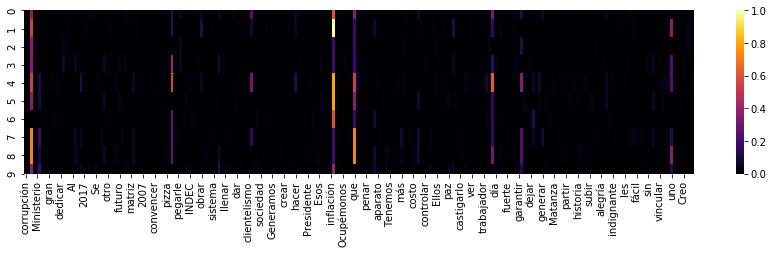

In [36]:
plt.figure(figsize=(15,3))
sns.heatmap(tb/tb.max().max(),cmap='inferno',annot=False)

In [37]:
from spacy.lang.es.stop_words import STOP_WORDS

In [43]:
data=np.zeros((10,10))
docs=[nlp(text) for text in (t0,t1,t2,t3,t4,t5,t6,t7,t8,t9)]

for ii,doc_a in enumerate(docs):
    for jj,doc_b in enumerate(docs):
        data[ii,jj]=jaccard(doc_a,doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.085714,0.041667,0.114286,0.080000,0.129032,0.058824,0.100000,0.076923,0.000000
1,0.085714,1.000000,0.045455,0.057143,0.061224,0.064516,0.062500,0.050000,0.052632,0.000000
2,0.041667,0.045455,1.000000,0.043478,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.114286,0.057143,0.043478,1.000000,0.039216,0.096774,0.060606,0.048780,0.051282,0.000000
4,0.080000,0.061224,0.026316,0.039216,1.000000,0.088889,0.086957,0.074074,0.056604,0.000000
5,0.129032,0.064516,0.000000,0.096774,0.088889,1.000000,0.068966,0.083333,0.088235,0.037037
6,0.058824,0.062500,0.000000,0.060606,0.086957,0.068966,1.000000,0.081081,0.055556,0.000000
7,0.100000,0.050000,0.000000,0.048780,0.074074,0.083333,0.081081,1.000000,0.095238,0.027778
8,0.076923,0.052632,0.000000,0.051282,0.056604,0.088235,0.055556,0.095238,1.000000,0.029412
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.027778,0.029412,1.000000


In [44]:
tb=tf_idf_scores(docs)
tb/tb.max().max()

,corrupción,Fernandez,paso,Ministerio,13,inconductas,darle,dedicar,dueño,licitación,...,fácil,crimen,vincular,argentino,monotributistas,atrás,Cientos,moderno,militante,crisis
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.03125,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03125,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03125,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.03125,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.03125,0.03125,0.00000
4,0.00000,0.03125,0.00000,0.00000,0.00000,0.00000,0.03125,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0625,0.00000,0.03125,0.00000,0.00000,0.00000,0.03125
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0625,0.00000,0.00000,0.03125,0.00000,0.00000,0.00000
6,0.00000,0.00000,0.00000,0.00000,0.00000,0.03125,0.00000,0.03125,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.03125,0.03125,0.03125,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8,0.00000,0.00000,0.00000,0.03125,0.03125,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.03125,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


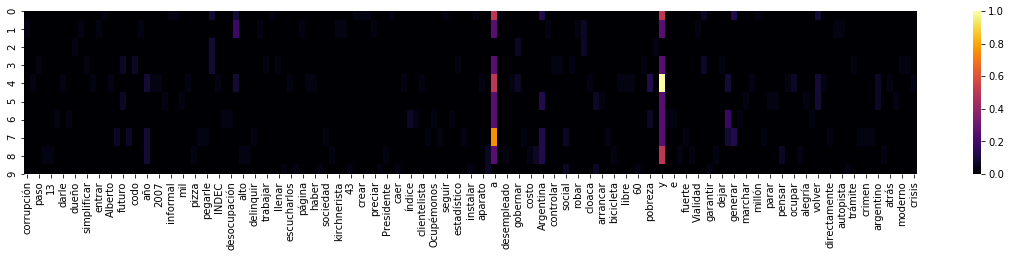

In [52]:
plt.figure(figsize=(20,3))
sns.heatmap(tb/tb.max().max(),cmap='inferno',annot=False)

In [69]:
len(tb.columns)

149

In [63]:
df=tb/tb.max().max()

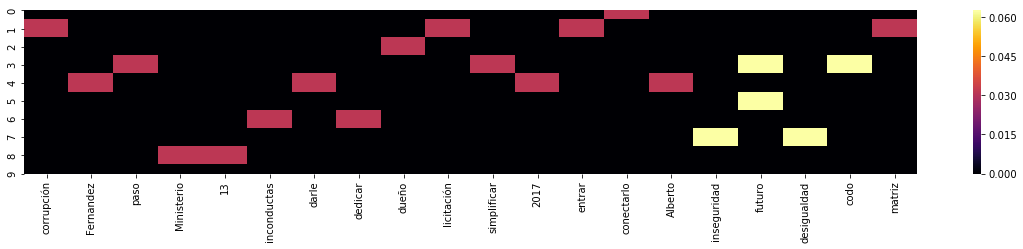

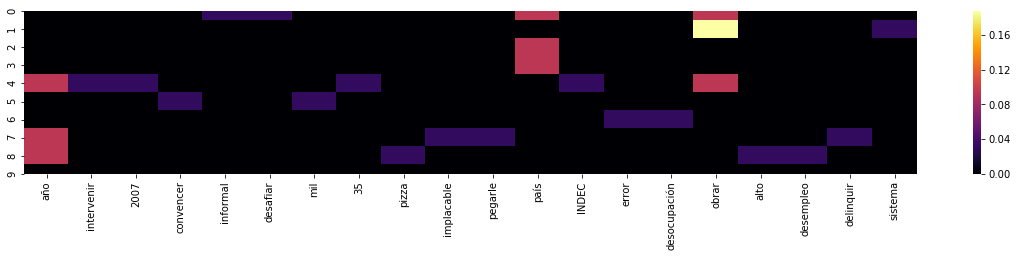

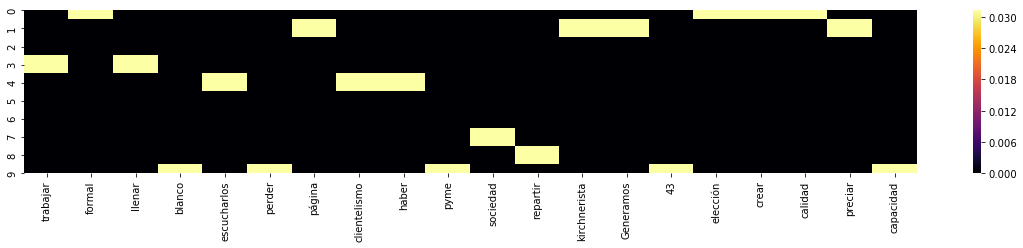

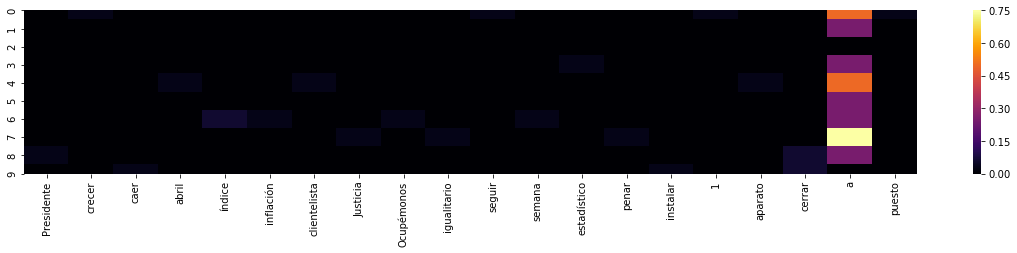

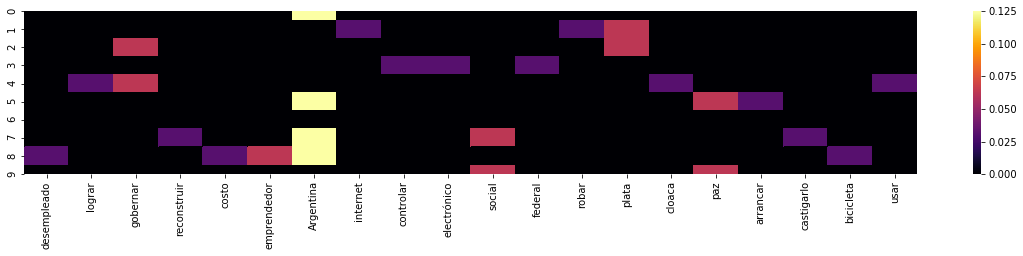

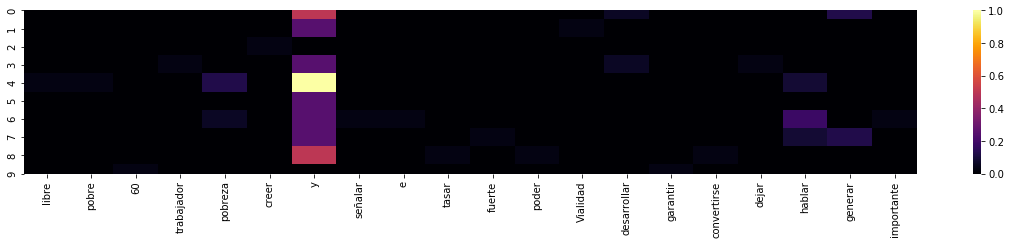

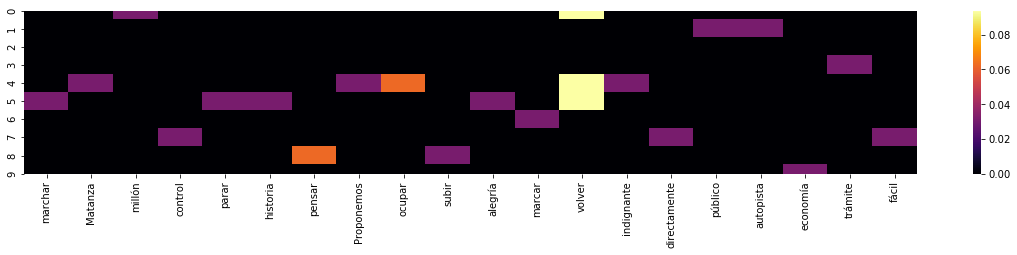

In [68]:
for i in range(len(tb.columns)//20):
        plt.figure(figsize=(20,3))
        sns.heatmap(df.iloc[:,i*20:i*20+20], cmap='inferno',annot=False)